In [560]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [561]:
weather = pd.read_csv("NOAA_weather.csv", index_col="DATE")

In [562]:
weather.groupby(by="NAME").describe(include=[np.number])

LATITUDE            \
                                                 count      mean   
NAME                                                               
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US  10841.0  30.18311   
CHICAGO MIDWAY AIRPORT, IL US                   9807.0  41.78412   
DENVER INTERNATIONAL AIRPORT, CO US            10624.0  39.84657   
MIAMI OPA LOCKA AIRPORT, FL US                  9421.0  25.91017   
NY CITY CENTRAL PARK, NY US                    16143.0  40.77898   

                                                                       \
                                                        std       min   
NAME                                                                    
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US  3.552878e-15  30.18311   
CHICAGO MIDWAY AIRPORT, IL US                  1.421158e-14  41.78412   
DENVER INTERNATIONAL AIRPORT, CO US            0.000000e+00  39.84657   
MIAMI OPA LOCKA AIRPORT, FL US                 3.552902e-15  25.91017   
NY CITY CENTRAL PARK, NY US                    7.105647e-15  40.77898   

                                                                             \
                                                    25%       50%       75%   
NAME                                                                          
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US  30.18311  30.18311  30.18311   
CHICAGO MIDWAY AIRPORT, IL US                  41.78412  41.78412  41.78412   
DENVER INTERNATIONAL AIRPORT, CO US            39.84657  39.84657  39.84657   
MIAMI OPA LOCKA AIRPORT, FL US                 25.91017  25.91017  25.91017   
NY CITY CENTRAL PARK, NY US                    40.77898  40.77898  40.77898   

                                                        LONGITUDE             \
                                                    max     count       mean   
NAME                                                                           
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US  30.18311   10841.0  -97.67989   
CHICAGO MIDWAY AIRPORT, IL US                  41.78412    9807.0  -87.75514   
DENVER INTERNATIONAL AIRPORT, CO US            39.84657   10624.0 -104.65623   
MIAMI OPA LOCKA AIRPORT, FL US                 25.91017    9421.0  -80.28283   
NY CITY CENTRAL PARK, NY US                    40.77898   16143.0  -73.96925   

                                               ...  WSFG         WSFM  \
                                               ...   75%   max  count   
NAME                                           ...                      
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US  ...   NaN   NaN    0.0   
CHICAGO MIDWAY AIRPORT, IL US                  ...   NaN   NaN    0.0   
DENVER INTERNATIONAL AIRPORT, CO US            ...   NaN   NaN    0.0   
MIAMI OPA LOCKA AIRPORT, FL US                 ...   NaN   NaN    0.0   
NY CITY CENTRAL PARK, NY US                    ...  25.3  64.4  683.0   

                                                                               \
                                                    mean       std  min   25%   
NAME                                                                            
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US        NaN       NaN  NaN   NaN   
CHICAGO MIDWAY AIRPORT, IL US                        NaN       NaN  NaN   NaN   
DENVER INTERNATIONAL AIRPORT, CO US                  NaN       NaN  NaN   NaN   
MIAMI OPA LOCKA AIRPORT, FL US                       NaN       NaN  NaN   NaN   
NY CITY CENTRAL PARK, NY US                    21.795608  7.220375  6.9  16.1   

                                                                 
                                                50%   75%   max  
NAME                                                             
AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US   NaN   NaN   NaN  
CHICAGO MIDWAY AIRPORT, IL US                   NaN   NaN   NaN  
DENVER INTERNATIONAL AIRPORT, CO US             NaN   NaN   NaN  
MIAMI OPA LO

In [563]:
stations = [x for _, x in weather.groupby("NAME")]
station_names_org = [df["NAME"][0] for df in stations]
states = set(["TX", "IL", "FL", "NY", "CO"])
station_names = list(map(lambda s: " ".join(map(lambda w: w.capitalize() if w not in states else w, s.split(" ")))[:-3], station_names_org))
station_names


/tmp/ipykernel_1797/146398855.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  station_names_org = [df["NAME"][0] for df in stations]


['Austin Bergstrom International Airport, TX',
 'Chicago Midway Airport, IL',
 'Denver International Airport, CO',
 'Miami Opa Locka Airport, FL',
 'NY City Central Park, NY']

In [564]:
# Percent null per column
round(weather.apply(pd.isnull).sum()/weather.shape[0]*100, 2)

STATION        0.00
NAME           0.00
LATITUDE       0.00
LONGITUDE      0.00
ELEVATION      0.00
ACMH         100.00
AWND          13.89
FMTM          53.02
PGTM          43.77
PRCP           1.60
PSUN          97.35
SNOW          34.60
SNWD          34.78
TAVG          63.11
TMAX           0.88
TMIN           0.95
TSUN          79.32
WDF1          92.36
WDF2          14.30
WDF5          14.48
WDFG          92.33
WDFM          98.80
WESD          99.99
WSF1          92.36
WSF2          14.30
WSF5          14.40
WSFG          92.29
WSFM          98.80
dtype: float64

In [565]:
weather.index = pd.to_datetime(weather.index)
weather_new = weather[weather.index.year > 1999].copy()
weather_new

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,ACMH,AWND,FMTM,PGTM,PRCP,...,WDF2,WDF5,WDFG,WDFM,WESD,WSF1,WSF2,WSF5,WSFG,WSFM
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-01,USW00014819,"CHICAGO MIDWAY AIRPORT, IL US",41.78412,-87.75514,185.8,NaN,7.61,701.0,700.0,0.00,...,210.0,210.0,NaN,NaN,NaN,NaN,15.0,21.0,NaN,NaN
2000-01-02,USW00014819,"CHICAGO MIDWAY AIRPORT, IL US",41.78412,-87.75514,185.8,NaN,15.21,1554.0,1635.0,0.01,...,250.0,260.0,NaN,NaN,NaN,NaN,30.0,36.0,NaN,NaN
2000-01-03,USW00014819,"CHICAGO MIDWAY AIRPORT, IL US",41.78412,-87.75514,185.8,NaN,13.42,736.0,1931.0,0.14,...,60.0,30.0,NaN,NaN,NaN,NaN,21.9,25.1,NaN,NaN
2000-01-04,USW00014819,"CHICAGO MIDWAY AIRPORT, IL US",41.78412,-87.75514,185.8,NaN,14.54,456.0,33.0,0.01,...,300.0,310.0,NaN,NaN,NaN,NaN,23.0,29.1,NaN,NaN
2000-01-05,USW00014819,"CHICAGO MIDWAY AIRPORT, IL US",41.78412,-87.75514,185.8,NaN,12.53,2126.0,2126.0,0.00,...,190.0,180.0,NaN,NaN,NaN,NaN,23.9,28.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-08,USW00012882,"MIAMI OPA LOCKA AIRPORT, FL US",25.91017,-80.28283,1.3,NaN,6.93,NaN,NaN,0.00,...,140.0,140.0,NaN,NaN,NaN,NaN,17.0,23.9,NaN,NaN
2024-03-09,USW00012882,"MIAMI OPA LOCKA AIRPORT, FL US",25.91017,-80.28283,1.3,NaN,10.51,NaN,NaN,0.00,...,160.0,160.0,NaN,NaN,NaN,NaN,21.0,27.1,NaN,NaN
2024-03-10,USW00012882,"MIAMI OPA LOCKA AIRPORT, FL US",25.91017,-80.28283,1.3,NaN,10.07,NaN,NaN,0.00,...,270.0,280.0,NaN,NaN,NaN,NaN,21.9,29.1,NaN,NaN


In [566]:
null_prct

STATION        0.000000
NAME           0.000000
LATITUDE       0.000000
LONGITUDE      0.000000
ELEVATION      0.000000
ACMH         100.000000
AWND           1.228384
FMTM          60.850350
PGTM          46.227591
PRCP           0.607393
PSUN          97.103551
SNOW          35.693403
SNWD          34.589670
TAVG          59.710355
TMAX           0.763774
TMIN           0.761508
TSUN          82.560116
WDF1         100.000000
WDF2           1.244249
WDF5           1.484487
WDFG         100.000000
WDFM         100.000000
WESD          99.984135
WSF1         100.000000
WSF2           1.244249
WSF5           1.411962
WSFG         100.000000
WSFM         100.000000
dtype: float64

In [567]:
null_prct = weather_new.apply(pd.isnull).sum()/weather_new.shape[0]*100
valid_cols = list(filter(lambda w: null_prct[w] < 2, weather_new))

In [568]:
weather_new = weather_new[valid_cols]
weather_new["target"] = weather_new.shift(-1)["TMAX"]
weather_new = weather_new.ffill()
# weather_new = weather_new.select_dtypes(exclude=['object'])
weather_new.drop(["LATITUDE", "LONGITUDE", "ELEVATION"], inplace=True, axis=1)
weather_new.apply(pd.isnull).sum()/weather_new.shape[0]*100
pr = [x for _, x in weather_new.groupby("NAME")]
pr = [df.select_dtypes(exclude=['object']) for df in pr]
pr[-1]

/tmp/ipykernel_1797/2642717175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_new["target"] = weather_new.shift(-1)["TMAX"]


,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,target
DATE,,,,,,,,,
2000-01-01,5.82,0.00,50.0,34.0,250.0,230.0,16.1,21.0,60.0
2000-01-02,4.70,0.00,60.0,43.0,260.0,260.0,16.1,25.1,64.0
2000-01-03,6.71,0.00,64.0,51.0,260.0,250.0,15.0,21.0,60.0
2000-01-04,7.83,0.70,60.0,46.0,320.0,350.0,15.0,23.9,47.0
2000-01-05,11.41,0.00,47.0,29.0,330.0,340.0,23.9,32.0,42.0
...,...,...,...,...,...,...,...,...,...
2024-03-08,5.14,0.00,57.0,40.0,60.0,40.0,15.0,23.9,49.0
2024-03-09,7.38,1.53,49.0,41.0,90.0,100.0,19.9,32.0,51.0
2024-03-10,9.62,0.03,51.0,37.0,280.0,270.0,21.9,38.0,52.0


In [569]:
processed = []
for d in stations:
    columns = ['PRCP', 'TMAX', 'TMIN'] # non-null numeric cols only
    df = d[columns].copy()          
    df.index = pd.to_datetime(df.index)
    df["target"] = df.shift(-1)["TMAX"]     # make target the max temperature of next day
    df = df.ffill()
    df["PRCP"].fillna(0.0, inplace=True)
    processed.append(df)
print(station_names[-1])
processed[-1].head()

NY City Central Park, NY


/tmp/ipykernel_1797/4207424753.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PRCP"].fillna(0.0, inplace=True)
/tmp/ipykernel_1797/4207424753.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

,PRCP,TMAX,TMIN,target
DATE,,,,
1980-01-01,0.00,45.0,34.0,42.0
1980-01-02,0.00,42.0,34.0,38.0
1980-01-03,0.00,38.0,28.0,30.0
1980-01-04,0.00,30.0,21.0,32.0
1980-01-05,0.07,32.0,26.0,32.0


In [570]:
# First row has null temp vals
processed[2].drop('1994-07-19',inplace=True)

In [571]:
for df in processed:
    print(f"Total null: {round(df.apply(pd.isnull).sum().sum()/df.shape[0]*100, 2)}%")

Total null: 0.0%
Total null: 0.0%
Total null: 0.0%
Total null: 0.0%
Total null: 0.0%


In [572]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

data = pr[-1]
y = data["target"]
x = data.loc[:, data.columns != "target"]
x = sm.add_constant(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     5304.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:56:13   Log-Likelihood:                -23603.
No. Observations:                7070   AIC:                         4.722e+04
Df Residuals:                    7061   BIC:                         4.729e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0275      0.571     31.593      0.0

Error: 48.287


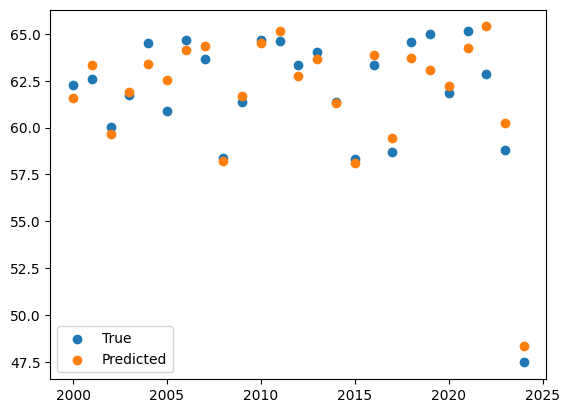

In [573]:
from sklearn.metrics import mean_squared_error
y_pred = result.predict(X_test)
print(f"Error: {round(mean_squared_error(y_test, y_pred), 3)}")
years = X_test.index.year
valid_years = years.value_counts().index
plt.scatter(valid_years, y_test.groupby(years).mean(), label="True")
plt.scatter(valid_years, y_pred.groupby(years).mean(), label="Predicted")
plt.legend()

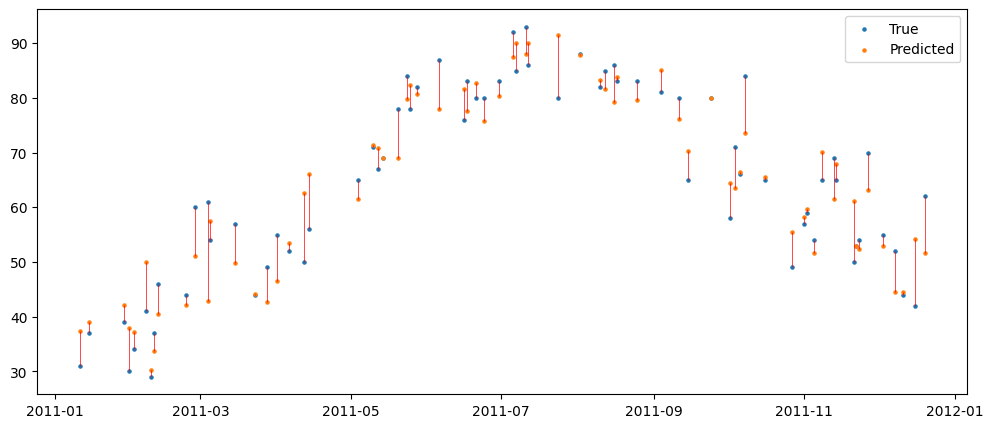

In [574]:
ind = y_pred[y_pred.index.year == 2011].index
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(ind, y_test[ind], s=5, label="True")
ax.scatter(ind, y_pred[ind], s=5, label="Predicted")
ax.legend()
combined = pd.concat([y_pred[ind], y_test[ind]], axis=1)
_ = ax.vlines(ind, ymin=combined.min(axis=1), ymax=combined.max(axis=1), colors="r", lw=0.5)

LSTM

In [575]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
data = data.loc[:, data.columns != "target"]
scaled_data = scaler.fit_transform(data)

# scaled_data = np.array(data)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][2]  # 'TMAX' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.85 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (7503, 10, 8)
Train Y shape: (7503,)
Test X shape: (1325, 10, 8)
Test Y shape: (1325,)


In [576]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()
# dropout hyperparameter
dropout = 0.2
# Add LSTM layers with dropout
model.add(LSTM(units=256, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(dropout))

model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(dropout))

model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(dropout))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [577]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_63 (LSTM)              (None, 10, 256)           271360    
                                                                 
 dropout_63 (Dropout)        (None, 10, 256)           0         
                                                                 
 lstm_64 (LSTM)              (None, 10, 128)           197120    
                                                                 
 dropout_64 (Dropout)        (None, 10, 128)           0         
                                                                 
 lstm_65 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_65 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 1)               

In [578]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [579]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('./best_model_weights.h5', monitor='val_loss', save_best_only=True)


history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100


94/94 [==============================] - 5s 21ms/step - loss: 0.0214 - val_loss: 0.0100
Epoch 2/100
 6/94 [>.............................] - ETA: 1s - loss: 0.0144

/home/efim-sokolov/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94/94 [==============================] - 1s 15ms/step - loss: 0.0119 - val_loss: 0.0103
Epoch 3/100
94/94 [==============================] - 1s 14ms/step - loss: 0.0119 - val_loss: 0.0095
Epoch 4/100
94/94 [==============================] - 1s 14ms/step - loss: 0.0110 - val_loss: 0.0094
Epoch 5/100
94/94 [==============================] - 1s 14ms/step - loss: 0.0103 - val_loss: 0.0089
Epoch 6/100
94/94 [==============================] - 1s 14ms/step - loss: 0.0094 - val_loss: 0.0077
Epoch 7/100
94/94 [==============================] - 1s 13ms/step - loss: 0.0088 - val_loss: 0.0073
Epoch 8/100
94/94 [==============================] - 1s 14ms/step - loss: 0.0085 - val_loss: 0.0067
Epoch 9/100
94/94 [==============================] - 1s 13ms/step - loss: 0.0074 - val_loss: 0.0064
Epoch 10/100
94/94 [==============================] - 1s 16ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 11/100
94/94 [==============================] - 1s 15ms/step - loss: 0.0074 - val_loss: 0.0055
Epoch 12/1

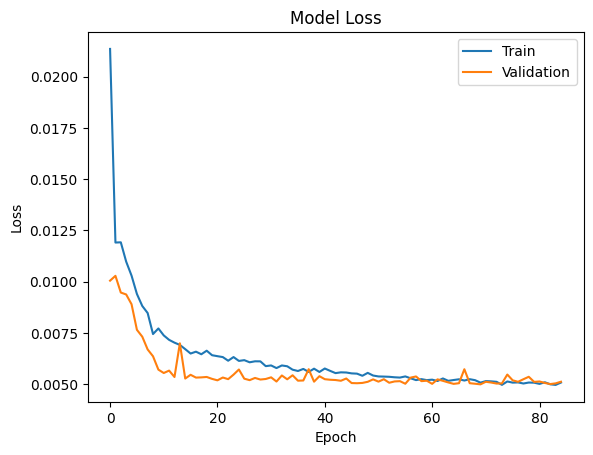

In [580]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [581]:
# load model
# model = tf.keras.models.load_model('./best_model_weights.h5')

In [582]:
y_pred = model.predict(test_x)

42/42 [==============================] - 1s 6ms/step


In [583]:
pred = sm.add_constant(y_pred)
pred = sm.add_constant(pred, prepend=True, has_constant="add")
for _ in range(5):
    pred = sm.add_constant(pred, prepend=False, has_constant="add")
pred = scaler.inverse_transform(pred)[:, 2]

In [584]:
true = sm.add_constant(test_y)
true = sm.add_constant(true, prepend=True, has_constant="add")
for _ in range(5):
    true = sm.add_constant(true, prepend=False, has_constant="add")
true = scaler.inverse_transform(true)[:, 2]

In [585]:
# pred = y_pred
# true = test_y
mean_squared_error(true, pred)

37.59767368487005

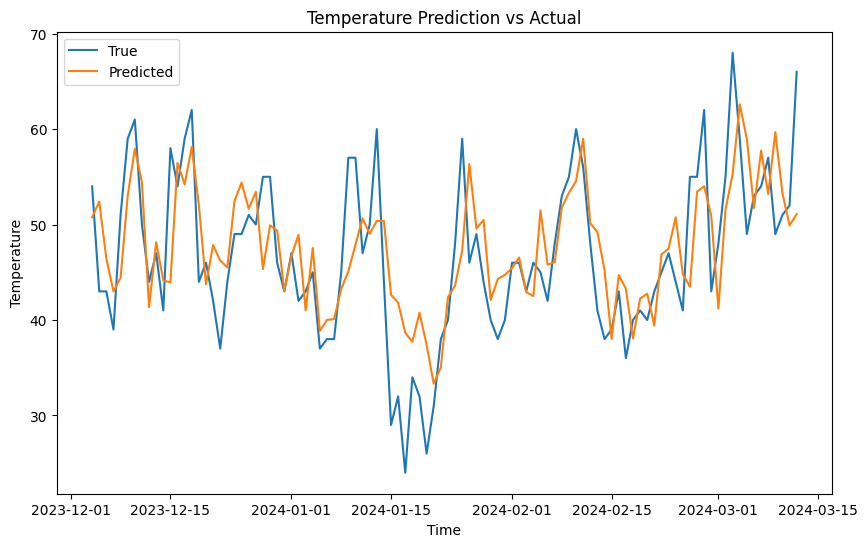

In [586]:
# Plotting predicted and actual temperatures
n = 100
plt.figure(figsize=(10, 6))
plt.plot(data.index[-n:], true[-n:], label='True')
plt.plot(data.index[-n:], pred[-n:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()
     